<a href="https://colab.research.google.com/github/Aditya6122/Drone-View-Object-Detection/blob/main/Custom_CNN_for_Drone_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="tbwjbJaqSTCkdlcH4sVH")
project = rf.workspace("aditya-imsui").project("object-detection-hd")
dataset = project.version(27).download("voc")

loading Roboflow workspace...
loading Roboflow project...
Exporting format voc in progress : 85.0%
Version export complete for voc format


Extracting Dataset Version Zip to object-detection---HD-27 in voc:: 100%|██████████| 6962/6962 [00:00<00:00, 10775.70it/s]


In [4]:
import os

In [5]:
train_path = '/content/object-detection---HD-27/train'
val_path = '/content/object-detection---HD-27/valid'
train = sorted(os.listdir(train_path))
val = sorted(os.listdir(val_path))

In [6]:
train_annotations = [i for i in train if i[-3:]=='xml']
train_imgs = [i for i in train if i[-3:]=='jpg']
val_annotations = [i for i in val if i[-3:]=='xml']
val_imgs = [i for i in val if i[-3:]=='jpg']

In [7]:
for i in range(len(train_annotations)):
    os.rename(os.path.join(train_path,train_imgs[i]),os.path.join(train_path,'image'+str(i).zfill(5)+'.jpg'))
    os.rename(os.path.join(train_path,train_annotations[i]),os.path.join(train_path,'annotation'+str(i).zfill(5)+'.xml'))

In [8]:
for i in range(len(val_annotations)):
    os.rename(os.path.join(val_path,val_imgs[i]),os.path.join(val_path,'image'+str(i).zfill(5)+'.jpg'))
    os.rename(os.path.join(val_path,val_annotations[i]),os.path.join(val_path,'annotation'+str(i).zfill(5)+'.xml'))

In [9]:
train = sorted(os.listdir(train_path))
train_annotations = [i for i in train if i[-3:]=='xml']
train_imgs = [i for i in train if i[-3:]=='jpg']

In [10]:
val = sorted(os.listdir(val_path))
val_annotations = [i for i in val if i[-3:]=='xml']
val_imgs = [i for i in val if i[-3:]=='jpg']

In [11]:
len(train_annotations),len(train_imgs)

(3294, 3294)

In [12]:
len(val_annotations),len(val_imgs)

(185, 185)

In [13]:
!rm -rf /content/data
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!mkdir /content/data/train/images
!mkdir /content/data/train/annotations
!mkdir /content/data/val/images
!mkdir /content/data/val/annotations

In [14]:
new_train_annot_path = '/content/data/train/annotations'
new_train_imgs_path = '/content/data/train/images'
new_val_annot_path = '/content/data/val/annotations'
new_val_imgs_path = '/content/data/val/images'

In [15]:
import shutil
for i in range(len(train_annotations)):
    shutil.copyfile(os.path.join(train_path,train_annotations[i]), os.path.join(new_train_annot_path,train_annotations[i]))
    shutil.copyfile(os.path.join(train_path,train_imgs[i]), os.path.join(new_train_imgs_path,train_imgs[i]))

In [16]:
for i in range(len(val_annotations)):
    shutil.copyfile(os.path.join(val_path,val_annotations[i]), os.path.join(new_val_annot_path,val_annotations[i]))
    shutil.copyfile(os.path.join(val_path,val_imgs[i]), os.path.join(new_val_imgs_path,val_imgs[i]))

In [17]:
from PIL import Image
import xml.etree.ElementTree as ET

In [18]:
!rm -rf /content/drive/MyDrive/Objectdetection/image_classification/data/
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/
!rm -rf /content/drive/MyDrive/Objectdetection/image_classification/.ipynb_checkpoints
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val


!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/car
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/pedestrain
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/tree
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/motorcycle

!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/car
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/pedestrain
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/tree
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/motorcycle

In [19]:
root = '/content/data/train'

imgs = os.listdir(os.path.join(root,"images"))
annots = os.listdir(os.path.join(root,"annotations"))

img_path = []
annot_path = []
for i in range(len(imgs)):
    img_path.append(os.path.join(root,"images",imgs[i]))
    annot_path.append(os.path.join(root,"annotations",annots[i]))

img_path = list(sorted(img_path))
annot_path = list(sorted(annot_path))


saved_root = '/content/drive/MyDrive/Objectdetection/image_classification/data/train'

last = {'tree':-1,'pedestrain':-1,'car':-1,'motorcycle':-1}

for idx in range(len(img_path)):
    img = Image.open(img_path[idx]).convert("RGB")
    tree = ET.parse(annot_path[idx])
    root = tree.getroot()

    for obj in root.findall('.//object'):
        label = obj.find('name').text
        
    last[label]+=1
    img.save(os.path.join(saved_root,label,str(label)+str(last[label]).zfill(5)+'.jpg'))
    img.close()

In [20]:
root = '/content/data/val'

imgs = os.listdir(os.path.join(root,"images"))
annots = os.listdir(os.path.join(root,"annotations"))

img_path = []
annot_path = []
for i in range(len(imgs)):
    img_path.append(os.path.join(root,"images",imgs[i]))
    annot_path.append(os.path.join(root,"annotations",annots[i]))

img_path = list(sorted(img_path))
annot_path = list(sorted(annot_path))


saved_root = '/content/drive/MyDrive/Objectdetection/image_classification/data/val'

last = {'tree':-1,'pedestrain':-1,'car':-1,'motorcycle':-1}

for idx in range(len(img_path)):
    img = Image.open(img_path[idx]).convert("RGB")
    tree = ET.parse(annot_path[idx])
    root = tree.getroot()

    for obj in root.findall('.//object'):
        label = obj.find('name').text
        
    last[label]+=1
    img.save(os.path.join(saved_root,label,str(label)+str(last[label]).zfill(5)+'.jpg'))
    img.close()

In [21]:
print("car :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/car')))
print("motorcyle :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/motorcycle')))
print("pedestrain :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/pedestrain')))
print("tree :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/tree')))

car : 1152
motorcyle : 618
pedestrain : 477
tree : 1047


In [22]:
print("car :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/car')))
print("motorcyle :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/motorcycle')))
print("pedestrain :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/pedestrain')))
print("tree :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/tree')))

car : 69
motorcyle : 23
pedestrain : 30
tree : 63


In [23]:
!rm -rf /content/data
!cp -r /content/drive/MyDrive/Objectdetection/image_classification/data /content

#### Model Making

In [24]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [25]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(256),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


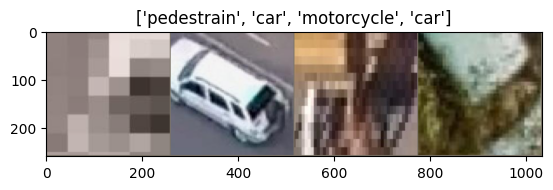

In [26]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [27]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [28]:
model_ft = models.mobilenet_v2(weights='DEFAULT')
num_ftrs = model_ft.classifier[1].in_features
model_ft.classifier[1] = nn.Linear(num_ftrs,4)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9,weight_decay = 0.000001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 123MB/s]


In [29]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7716 Acc: 0.6964
val Loss: 0.3867 Acc: 0.8757

Epoch 1/9
----------
train Loss: 0.5228 Acc: 0.7975
val Loss: 0.4201 Acc: 0.8324

Epoch 2/9
----------
train Loss: 0.4260 Acc: 0.8503
val Loss: 0.2772 Acc: 0.9243

Epoch 3/9
----------
train Loss: 0.3785 Acc: 0.8689
val Loss: 0.2070 Acc: 0.9243

Epoch 4/9
----------
train Loss: 0.3057 Acc: 0.8904
val Loss: 0.1912 Acc: 0.9297

Epoch 5/9
----------
train Loss: 0.2596 Acc: 0.9071
val Loss: 0.2563 Acc: 0.8973

Epoch 6/9
----------
train Loss: 0.2549 Acc: 0.9114
val Loss: 0.2283 Acc: 0.9243

Epoch 7/9
----------
train Loss: 0.2181 Acc: 0.9247
val Loss: 0.1193 Acc: 0.9784

Epoch 8/9
----------
train Loss: 0.1823 Acc: 0.9390
val Loss: 0.1271 Acc: 0.9730

Epoch 9/9
----------
train Loss: 0.1762 Acc: 0.9417
val Loss: 0.1103 Acc: 0.9784

Training complete in 5m 36s
Best val Acc: 0.978378


In [30]:
torch.save(model_ft.state_dict(), '/content/model_image_classification_mobilenet_v2.pt')

In [31]:
!cp /content/model_image_classification_mobilenet_v2.pt /content/drive/MyDrive/Objectdetection/image_classification